# Análisis exploratorio de series de tiempo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *
import warnings

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\a

In [2]:
fmri1.head()

cort1  cort2  cort3  cort4  thal1  thal2  cere1  cere2
0001 -0.336 -0.088 -0.579 -0.221 -0.222 -0.046 -0.354 -0.028
0002 -0.192 -0.359 -0.475 -0.058  0.072 -0.039 -0.346 -0.032
0003  0.062  0.062  0.063  0.192  0.145 -0.256 -0.337  0.272
0004  0.128  0.221  0.234 -0.004 -0.104 -0.030  0.149  0.042
0005  0.358  0.199  0.388  0.255  0.035 -0.081  0.311 -0.080

### Funciones de soporte para graficar funciones de autocorrelación

In [3]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

## Eliminar la tendencia usando estimación

Ejemplo usando los datos de temperatura global

In [4]:
fmri1.index

PeriodIndex(['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008',
             '0009', '0010',
             ...
             '0119', '0120', '0121', '0122', '0123', '0124', '0125', '0126',
             '0127', '0128'],
            dtype='period[A-DEC]', length=128)

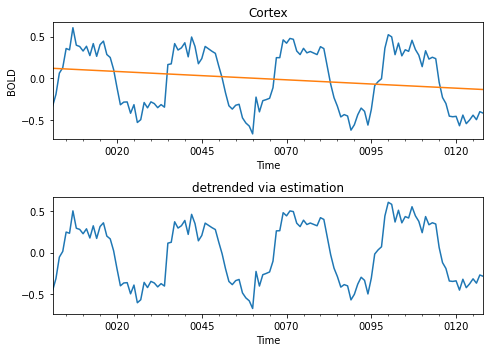

In [5]:
time = pd.Series([idx.ordinal for idx in fmri1.index], index=fmri1.index)
data_reg = pd.concat([time, fmri1.cort1], axis=1)
data_reg.columns = ["time", "cortex"]

fit = ols(formula="cortex ~ time", data=data_reg).fit()

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
fmri1.cort1.plot(ax=axes[0], xlabel='Time', ylabel='BOLD', title='Cortex', legend=False)
fit.fittedvalues.plot(ax=axes[0])

fit.resid.plot(ax=axes[1], xlabel="Time", title="detrended via estimation")
fig.tight_layout()
plt.show()

In [6]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cortex   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     5.513
Date:                Thu, 03 Nov 2022   Prob (F-statistic):             0.0204
Time:                        14:59:57   Log-Likelihood:                -48.865
No. Observations:                 128   AIC:                             101.7
Df Residuals:                     126   BIC:                             107.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8310      1.629     -2.352      0.020      -7.054      -0.608
time          -0.0020      0.001     -2.348      0.020      -0.004      -0.000
==============================================================================
Omnibus:                      519.161   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.223
Skew:                          -0.088   Prob(JB):                      0.00222
Kurtosis:                       1.496   Cond. No.                     9.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eliminar la tendencia usando diferenciación

Ejemplo usando los datos de temperatura global

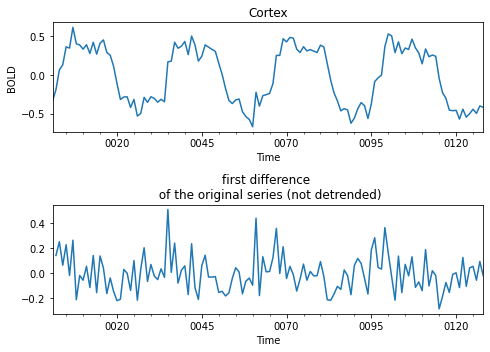

In [7]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
fmri1.cort1.plot(ax=axes[0], xlabel='Time', ylabel='BOLD', title='Cortex', legend=False)

fmri1.cort1.diff().plot(ax=axes[1], xlabel="Time", 
                    title="first difference \n of the original series (not detrended)",
                    legend=False)
fig.tight_layout()
plt.show()

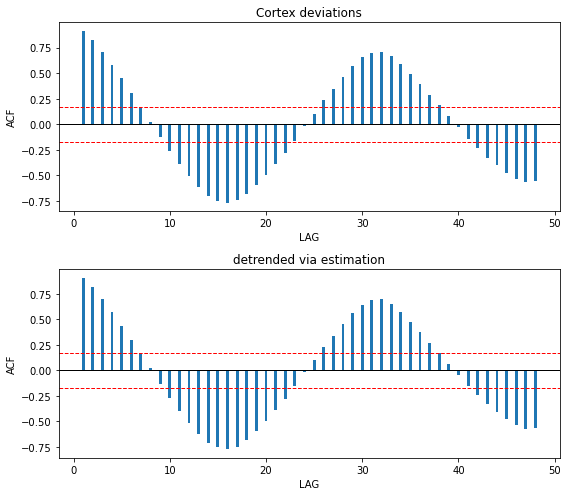

In [8]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

acf1(fmri1.cort1, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Cortex deviations")

acf1(fit.resid, nlags=48, ax=axes[1], width=.3)
axes[1].set_title("detrended via estimation")

fig.tight_layout()
plt.show()

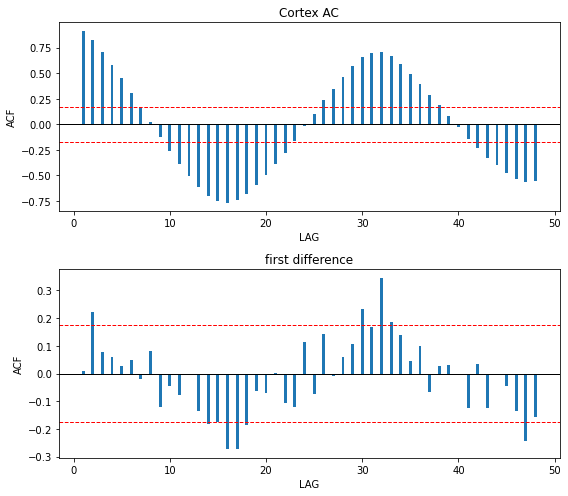

In [9]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 7))

acf1(fmri1.cort1, nlags=48, ax=axes[0], width=.3)
axes[0].set_title("Cortex AC")

acf1(fmri1.cort1.diff().dropna(), nlags=48, ax=axes[1], width=.3)
axes[1].set_title("first difference")

fig.tight_layout()
plt.show()

### Transformación logarítmica de una serie para reducir sus extremos 

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
fit.resid.plot(ax=axes[0], title="Cortex", xlabel="Time", legend=False)
(fit.resid*fit.resid).plot(ax=axes[1], title="Cortex^2", xlabel="Time", legend=False)
fig.tight_layout()
plt.show()